# Bank Marketing
------------------------------------------------------------------------------------------------------
<img src="banking.jpg">

##  We want to predict if a client has subscribed to a term deposit? (binary: 'yes','no')

------------------------------------------------------------------------------------------------------
Attribute Information:

Input variables:
## bank client data:
1 - age (numeric)


2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-
employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')
## related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone') 

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
## other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
## social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric).

17 - cons.price.idx: consumer price index - monthly indicator (numeric) 

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric) 

19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing  import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn import metrics

# Matplotlib for classic visualisations
import matplotlib.pyplot as plt

# These are the libraries used for the Decision Tree Visualization
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

import collections

import warnings
warnings.filterwarnings('ignore')

In [2]:
#read csv file to a pandas dataframe
df = pd.read_csv('./bank.csv',sep =';')

## Data Exploration

In [3]:
#show how data looks like
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [4]:
#show information about dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
age          4521 non-null int64
job          4521 non-null object
marital      4521 non-null object
education    4521 non-null object
default      4521 non-null object
balance      4521 non-null int64
housing      4521 non-null object
loan         4521 non-null object
contact      4521 non-null object
day          4521 non-null int64
month        4521 non-null object
duration     4521 non-null int64
campaign     4521 non-null int64
pdays        4521 non-null int64
previous     4521 non-null int64
poutcome     4521 non-null object
y            4521 non-null object
dtypes: int64(7), object(10)
memory usage: 600.5+ KB


List of all columns with respective data types
- there are columns which have type object that will have to be converted 

In [5]:
#check if there are any null values 
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

There are no null values in data

In [6]:
#Drop continues data
columns = df.columns.drop(['age','balance','duration','pdays'])
#print value count for all discrete data
for column in columns:
    print(df[column].value_counts())

management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: job, dtype: int64
married     2797
single      1196
divorced     528
Name: marital, dtype: int64
secondary    2306
tertiary     1350
primary       678
unknown       187
Name: education, dtype: int64
no     4445
yes      76
Name: default, dtype: int64
yes    2559
no     1962
Name: housing, dtype: int64
no     3830
yes     691
Name: loan, dtype: int64
cellular     2896
unknown      1324
telephone     301
Name: contact, dtype: int64
20    257
18    226
19    201
21    198
14    195
17    191
7     190
6     187
28    181
5     181
8     180
29    175
15    174
30    168
13    166
16    164
9     163
11    152
12    151
4     139
2     114
27    113
26    110
3     105
23    102
22     86
25     80
31     59
10     50
24     36
1      2

show a brief description of how the data looks like

In [7]:
# data sdescribtion
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4521.0,41.170095,10.576211,19.0,33.0,39.0,49.0,87.0
balance,4521.0,1422.657819,3009.638142,-3313.0,69.0,444.0,1480.0,71188.0
day,4521.0,15.915284,8.247667,1.0,9.0,16.0,21.0,31.0
duration,4521.0,263.961292,259.856633,4.0,104.0,185.0,329.0,3025.0
campaign,4521.0,2.793630,3.109807,1.0,1.0,2.0,3.0,50.0
pdays,4521.0,39.766645,100.121124,-1.0,-1.0,-1.0,-1.0,871.0
previous,4521.0,0.542579,1.693562,0.0,0.0,0.0,0.0,25.0


Perform value count for all columns

### Value Count Plot
        - number of values for a given a column

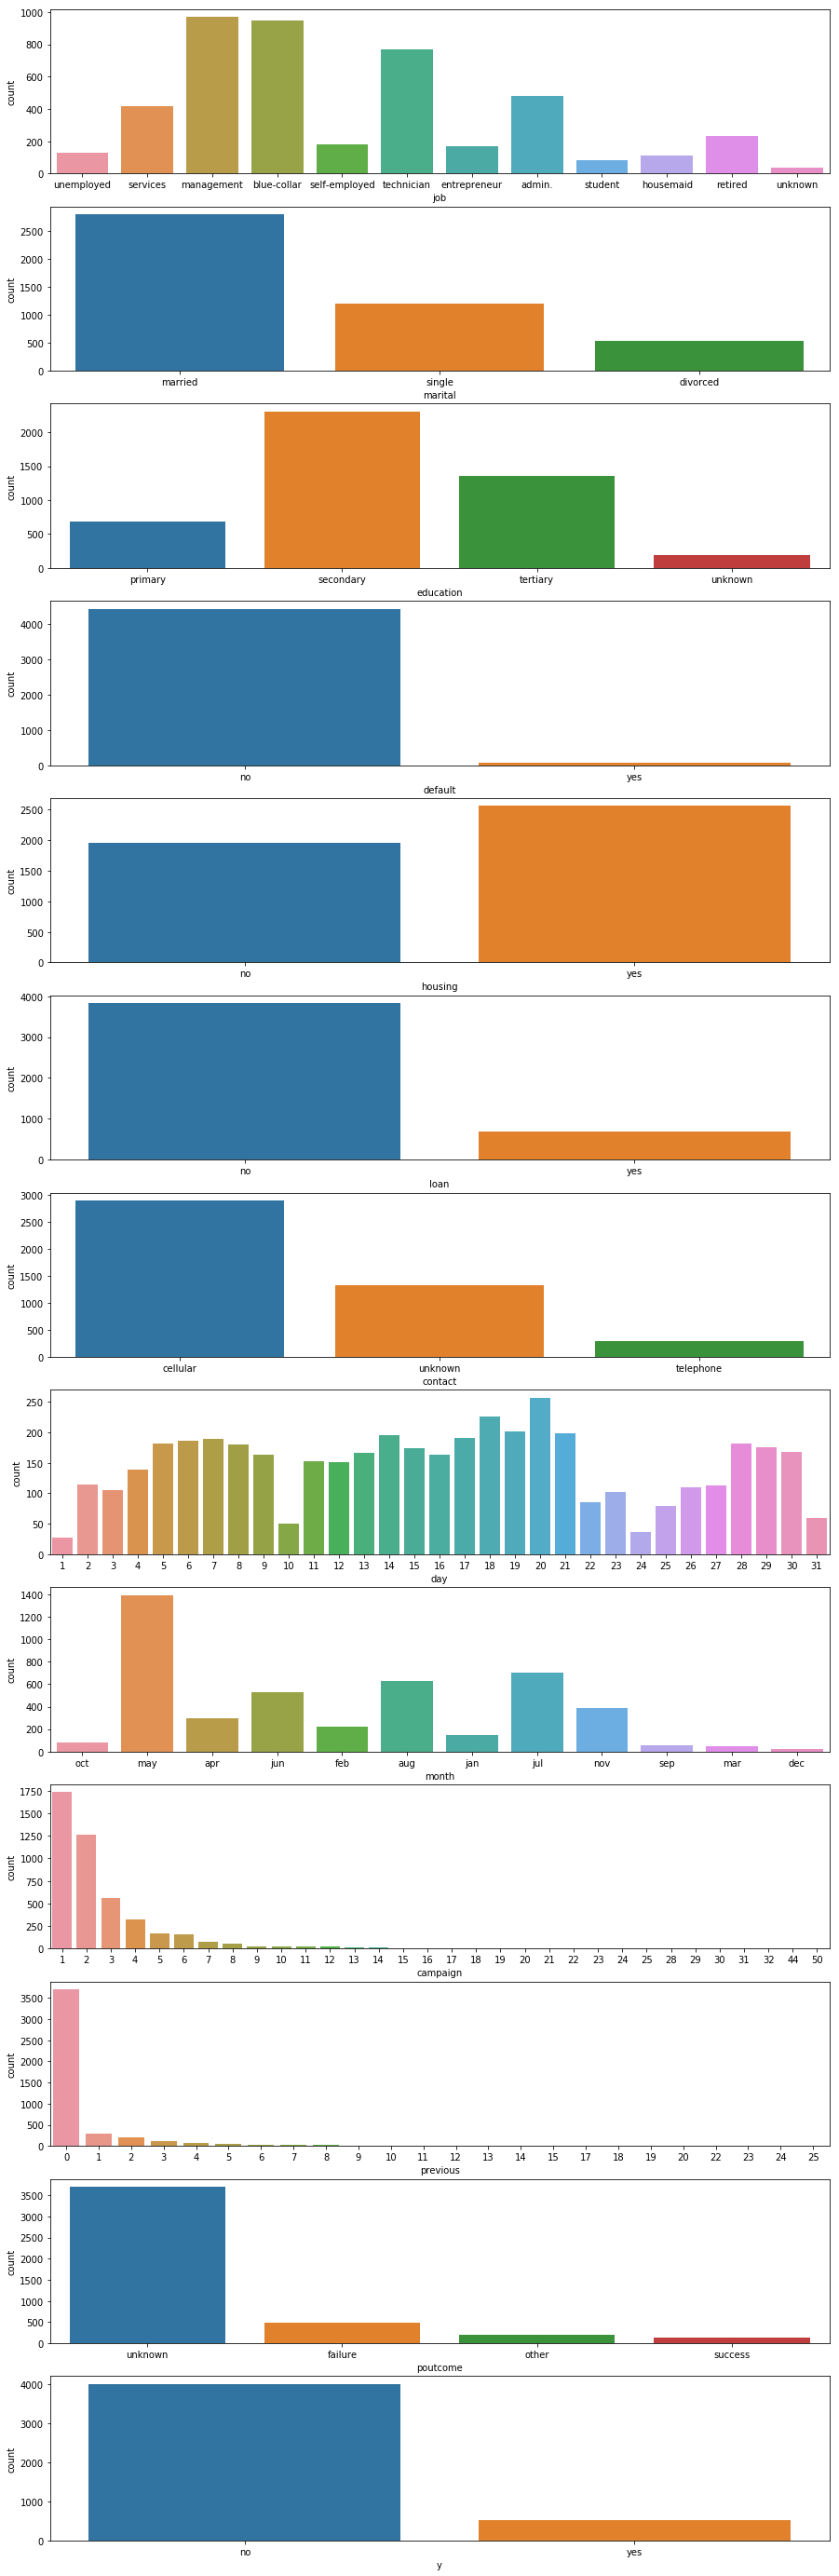

In [8]:
#show plots of number of values given a column 
i = 0
fig, ax = plt.subplots(13,1)
fig.set_figheight(50)
fig.set_figwidth(15)
for column in columns:
    sns.countplot(df[column], ax=ax[i])
    i = i + 1
fig.show()

### Histogram
        - visualize distributions for each chategory 

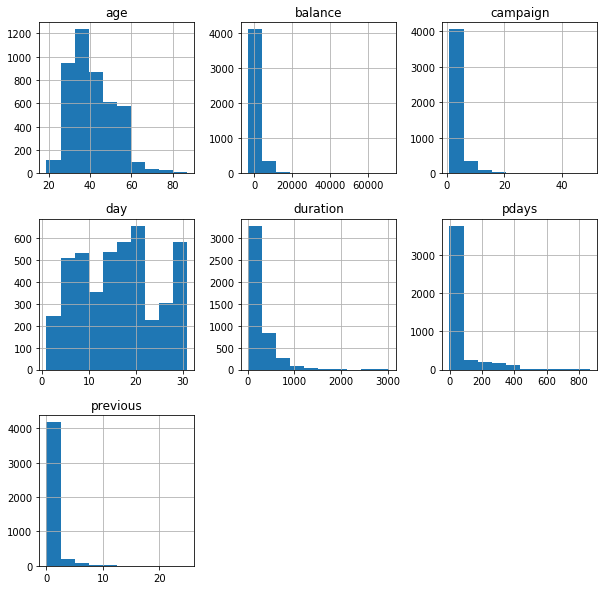

In [9]:
df.hist(figsize=(10,10));

   Comparing distributions of all columns with respect to those to clients who subscribed to a term deposit or not

age


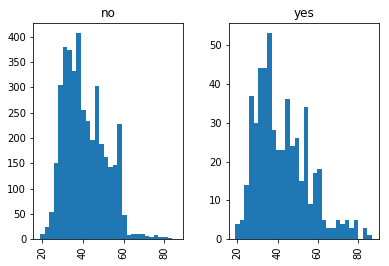

balance


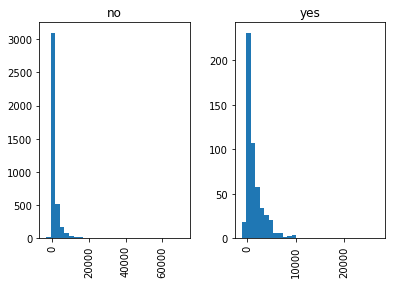

day


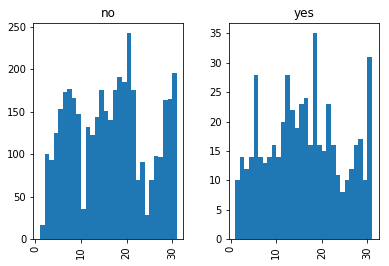

duration


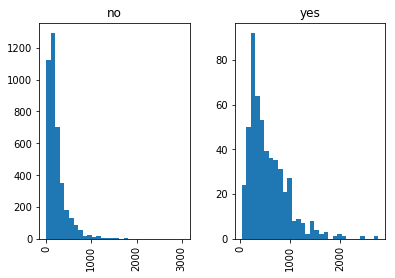

campaign


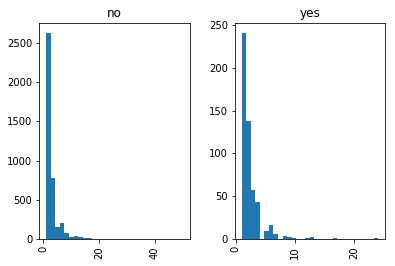

pdays


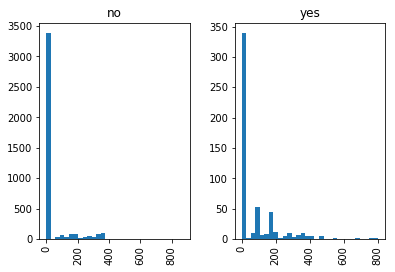

previous


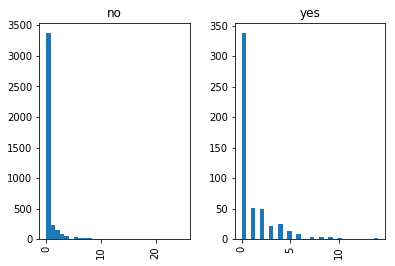

In [10]:
#show distributions per column with y = 'yes' or 'no'
for column in df.select_dtypes(exclude=['object']).columns:
     if column != 'y':
        print(column)
        hist = df[[column, 'y']].hist(by='y', bins=30)
        plt.show()

In [11]:
#Label encode loan, housing, defaul, y, columns from 'yes' or 'no' to '1' or '0'
enc = LabelEncoder()
df.housing = enc.fit_transform(df.housing)
df.y = enc.fit_transform(df.y)

df.loan = enc.fit_transform(df.loan)
df.default = enc.fit_transform(df.default)

### Correlation Matrix
         show how values correlate to each other 

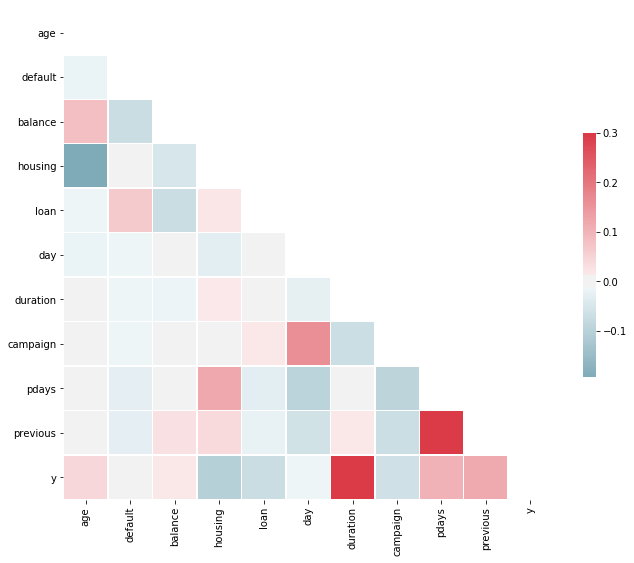

In [12]:
# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool) # Return an array of zeros with the same shape and type as a given array
mask[np.triu_indices_from(mask)] = True # Return the indices for the upper-triangle of arr

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [13]:
# get dummy variables on for 'job','merital','education','contact','month','poutcome'
df2 = pd.get_dummies(df,prefix=['job','merital','education','contact','month','poutcome'], drop_first=True)

In [14]:
#Split data into train and test
X = df2.iloc[:, :-1]
y = df2.iloc[:, -1:]
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.33, random_state=2)

## Decision Tree

In [15]:
# Create decision tree instance
decision_tree = DecisionTreeClassifier(max_depth=2)
# Fit the Random Forest Model over the training datatset
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)

In [16]:
# Print metrics 
print("Accuracy Score =  ", metrics.accuracy_score(Y_test, Y_pred))
print(metrics.confusion_matrix(Y_test, Y_pred))
print(metrics.classification_report(Y_test, Y_pred))

Accuracy Score =   1.0
[[ 268    0]
 [   0 1224]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00       268
          1       1.00      1.00      1.00      1224

avg / total       1.00      1.00      1.00      1492



In [17]:
#cross validation score
cross = cross_val_score(decision_tree,X_train,Y_train,cv=5,scoring='accuracy')
cross.mean()

1.0

In [18]:
#print mean square error
print('mean square error = ',mean_squared_error(Y_test, Y_pred))

mean square error =  0.0


## Random Forest

In [19]:
# Create random forest instance,train and predict
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)
Y_pred = rf.predict(X_test)

In [20]:
# print metrics
print("Accuracy Score =  ", metrics.accuracy_score(Y_test, Y_pred))
print(metrics.confusion_matrix(Y_test, Y_pred))
print(metrics.classification_report(Y_test, Y_pred))

Accuracy Score =   1.0
[[ 268    0]
 [   0 1224]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00       268
          1       1.00      1.00      1.00      1224

avg / total       1.00      1.00      1.00      1492



In [21]:
# print mean square error
print('mean square error = ', mean_squared_error(Y_test, Y_pred))

mean square error =  0.0


## Logistic Regression

In [22]:
# Create logistic regression tree instance
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, Y_train)
Y_pred = logisticRegr.predict(X_test)

In [23]:
# Print cross validation score 
cross = cross_val_score(logisticRegr, X_train, Y_train, cv=5, scoring='accuracy')
print('Cross Validation Score = ', cross.mean())

Cross Validation Score =  0.99900826446281


In [24]:
# Print metrics 
print("Accuracy Score =  ", metrics.accuracy_score(Y_test, Y_pred))
print(metrics.confusion_matrix(Y_test, Y_pred))
print(metrics.classification_report(Y_test, Y_pred))

Accuracy Score =   0.9986595174262735
[[ 266    2]
 [   0 1224]]
             precision    recall  f1-score   support

          0       1.00      0.99      1.00       268
          1       1.00      1.00      1.00      1224

avg / total       1.00      1.00      1.00      1492



In [25]:
# Print mean square error
print('mean square error = ',mean_squared_error(Y_test, Y_pred))

mean square error =  0.0013404825737265416


## K Nearest Neighbors

In [26]:
# Create k Nearest Neighbors instance,train and predict
neighbor = KNeighborsClassifier(n_neighbors=3)
neighbor.fit(X_train, Y_train)
Y_pred = neighbor.predict(X_test)

In [27]:
# Print cross validation score
cross = cross_val_score(neighbor,X_train,Y_train,cv=5,scoring='accuracy')
print('Cross Validation Score = ',cross.mean())

Cross Validation Score =  0.9564225028164042


In [28]:
# Print metrics 
print("Acurracy Score =  ", metrics.accuracy_score(Y_test, Y_pred))
print(metrics.confusion_matrix(Y_test, Y_pred))
print(metrics.classification_report(Y_test, Y_pred))

Acurracy Score =   0.9584450402144772
[[ 210   58]
 [   4 1220]]
             precision    recall  f1-score   support

          0       0.98      0.78      0.87       268
          1       0.95      1.00      0.98      1224

avg / total       0.96      0.96      0.96      1492



In [29]:
#print mean square error
print('mean square error = ', mean_squared_error(Y_test, Y_pred))

mean square error =  0.04155495978552279


## Grid Search

In [44]:
#
import numpy as np

from time import time
from scipy.stats import randint as sp_randint
from scipy.stats import uniform

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier

# build a classifier
clf = RandomForestClassifier(n_estimators=20)


# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

# specify parameters and distributions to sample from
param_dist = {"max_depth": [3, None],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": uniform(.001, .1),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# run randomized search
n_iter_search = 20
random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search)

start = time()
random_search.fit(X, y)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(random_search.cv_results_)

# use a full grid over all parameters
param_grid = {"max_depth": [3, None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}


# run grid search
grid_search = GridSearchCV(clf, param_grid=param_grid)
start = time()
grid_search.fit(X, y)

print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(grid_search.cv_results_['params'])))
report(grid_search.cv_results_)


RandomizedSearchCV took 3.25 seconds for 20 candidates parameter settings.
Model with rank: 1
Mean validation score: 1.000 (std: 0.000)
Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 8, 'min_samples_leaf': 0.011959487811636648, 'min_samples_split': 9}

Model with rank: 1
Mean validation score: 1.000 (std: 0.000)
Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 3, 'max_features': 9, 'min_samples_leaf': 0.018266711890502132, 'min_samples_split': 3}

Model with rank: 1
Mean validation score: 1.000 (std: 0.000)
Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'max_features': 9, 'min_samples_leaf': 0.037413687416605605, 'min_samples_split': 2}

Model with rank: 1
Mean validation score: 1.000 (std: 0.000)
Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': 3, 'max_features': 8, 'min_samples_leaf': 0.027936844052334233, 'min_samples_split': 2}

Model with rank: 1
Mean validation score: 1.000